# Tomography Fitter

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from trott import *
import numpy as np
import itertools

## Prepare Circuits

In [7]:
trott_gate = gen_3cnot_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,25,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range)
# qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

## Prepare Backend

In [8]:
# load IBMQ Account data
# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [9]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

## Capture Data

In [10]:
results = gen_results(qcs, backend=sim)

  0%|                                                                        | 0/21 [00:00<?, ?it/s]

Running with trott_steps = 4
Job ID f71f1759-be60-4596-9e0d-ebcecc07a7c6
Job ID 8ce10f63-4361-4178-9a8c-7a77a62be14c
Job ID 0f6ef5b4-ecda-4392-8362-d1a3a93f19ea
Job ID 1aab8cd1-1885-4d96-a407-a8cb136b5860
Job ID 0ec7929a-4bd3-44ee-9261-12aec64e07d0
Job ID cbad5e2b-3815-45ef-8f6c-d2e4a455c291
Job ID 6620101a-b240-4bf6-9577-4fe01c3ca902
Job ID b4e35756-99ae-4acf-9f74-118365daaa8b
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

  5%|███                                                             | 1/21 [00:14<04:48, 14.44s/it]

Job Status: job has successfully run
Running with trott_steps = 5
Job ID 9778206e-03d5-4474-b72a-911178ac6fef
Job ID 9b852bf1-7b1a-40da-91fc-a62e9df7ad4b
Job ID 126b39fe-62c0-4e0e-ae44-7e94b9092f35
Job ID 3e14c2c4-b2a0-4834-b97b-08cd73eca849
Job ID 20b26e23-5e29-4116-82ec-cf80513c74fd
Job ID 2f54388e-2fdf-4dd6-956c-0d14878deb88
Job ID 78cfa781-2dea-4552-b9ab-c5fe8a8947a2
Job ID 98f8ecea-e355-44a6-8ab1-ec5b0d0b3a14
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 10%|██████                                                          | 2/21 [00:30<04:52, 15.37s/it]

Job Status: job has successfully run
Running with trott_steps = 6
Job ID d724d526-97e5-4fa1-8660-2a9b008a7545
Job ID 4de1edaa-87a9-4fa6-b1f1-2b3fa257bdec
Job ID 4c3e2053-d98f-4740-9710-53c8edaa86e0
Job ID 4af9618d-fa98-4207-8710-f2e888bfba26
Job ID ba15ee29-2dde-48a2-b411-9fb86aade553
Job ID 74c64e04-7d50-4335-a669-9b35d6981cce
Job ID 483a79c9-35cc-416f-b6de-4357291a315c
Job ID 89e7b489-8e19-41bf-9b68-6dcf0db64d29
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 14%|█████████▏                                                      | 3/21 [00:48<04:56, 16.46s/it]

Job Status: job has successfully run
Running with trott_steps = 7
Job ID a4a17fe7-c65d-4af5-9258-9f3e787a1b25
Job ID dca46d01-6eae-4fdc-b0fb-03d4e059f924
Job ID aaa86b7e-7afc-49e2-9d08-e9f5e1b79213
Job ID d2cf67d3-7974-4e1f-9c0a-c359f67ef638
Job ID fb73a051-fa83-41fb-8598-339b11d2e968
Job ID 1c425d4f-bb94-49d5-abec-4a64224a748c
Job ID 4d58c39e-0f69-4727-843a-4acf51ec036d


 19%|████████████▏                                                   | 4/21 [01:02<04:26, 15.70s/it]

Job ID 94233467-09c9-4cf2-8bf1-3da41759587f
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Running with trott_steps = 8
Job ID d4886f39-12f7-47af-ac33-8a6c7198a321
Job ID 221e340d-601e-4130-bd7c-22ff07f43e1a
Job ID c2985a13-09c7-4ca9-90f1-70aa6e0e8db1
Job ID a74d8c9b-3a42-43ee-8ec7-a1af81754213
Job ID 63d5d57e-18bf-4628-a217-263d04bce27a
Job ID 9726eef1-caa8-4969-8486-7cc6f9d7cc63
Job ID bc8c5460-7a70-407e-9587-6e30b5255233
Job ID ec19a0c2-c95d-4467-99ad-e36be06cba55
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is a

 24%|███████████████▏                                                | 5/21 [01:24<04:43, 17.71s/it]

Job Status: job has successfully run
Running with trott_steps = 9
Job ID 7eea0d98-a8d1-4fdf-8672-2a5656f9a6e8
Job ID 25546b87-81d4-4ff3-97f2-241c88b4a977
Job ID fb5ca996-cc16-4df6-bbc3-8141c98b6c1e
Job ID ecded10e-a46a-4ac0-b772-9ea9220e34bf
Job ID 5a5e36b0-e7a7-4f2f-bb68-44ed42683a16
Job ID a906e6a5-7b1a-44a4-b265-130506f34bbd
Job ID cdbd4bac-cc1f-45aa-8ed3-34a0bdf4379c
Job ID 2716ddec-eba7-4303-a5a2-a521c05b85e3
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 29%|██████████████████▎                                             | 6/21 [01:47<04:53, 19.57s/it]

Job Status: job has successfully run
Running with trott_steps = 10
Job ID df29416d-58fb-41cf-886e-eb801c92d6dd
Job ID 51c9bc93-74a5-4483-86b1-9e5ffcc64706
Job ID 69a31e94-a909-48fd-b40f-bebd0970dc77
Job ID 804f1c02-ea18-434a-a582-74b6e027e380
Job ID f762b922-a98e-4f88-ba94-49a045058571
Job ID 82333c4c-2ecc-42dd-afa3-9b4a8bf4f9e9
Job ID 633f0d6d-27e6-40a7-a769-194ea5fc1496
Job ID 245a2b72-eba8-46db-98ec-ee88fb1c2c41
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 33%|█████████████████████▎                                          | 7/21 [02:11<04:57, 21.24s/it]

Job Status: job has successfully run
Running with trott_steps = 11
Job ID 31f5d97e-6956-418e-8560-b94833f4f205
Job ID 852ff1fa-2da5-41eb-85f5-1b8c6216054a
Job ID 79690ded-dedc-47e0-9876-9a1d0cca66c6
Job ID ed762905-2648-4baf-b47a-e8d48c60a518
Job ID 2a2c073e-f32d-432f-928e-5aa2c2fa2e44
Job ID 204b33b8-6eac-4ed4-adeb-e87763374c35
Job ID f604c8e3-10fe-478b-8cb5-df7730892343
Job ID f9f63f6d-af4c-4101-b2a8-85a2f79b01bd
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 38%|████████████████████████▍                                       | 8/21 [02:38<04:58, 22.99s/it]

Job Status: job has successfully run
Running with trott_steps = 12
Job ID 3b1ece91-139c-468b-a69b-d5f5d4d0751c
Job ID 321415c4-69c0-4d95-adc8-5ef9268503f9
Job ID afcd9448-bc2a-4701-8d8f-5c3eb39f9e9d
Job ID af1315d9-db47-4e34-a59d-13c8bc88b93d
Job ID d6d7c490-9617-40a4-b42b-c941b14051d4
Job ID ea924d6d-6aee-4fea-b49a-4ae49a6a194a
Job ID 54569d90-c48b-446e-aa28-f2268cfa664a
Job ID e53a9e93-9e38-414d-b933-ab2972c4dc7b
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 43%|███████████████████████████▍                                    | 9/21 [03:06<04:55, 24.60s/it]

Job Status: job has successfully run
Running with trott_steps = 13
Job ID 6bbadc20-90a1-4e20-b284-08fa6269d865
Job ID 23f9862d-7337-4563-928a-5f4a71c27d18
Job ID 17d4242a-f5fb-4c3a-a9de-82dc487add7a
Job ID ae6f16d3-b366-49ed-ac01-37143e8747cb
Job ID bb90c411-078f-4948-8f07-48261d87fc90
Job ID 72ebf570-da74-4f29-b2a1-8f8ebe3fe7e2
Job ID 798675cf-3ee9-481c-ab79-c71a64ed96e6
Job ID d6e91405-704f-4e1a-a99a-7cf62f4599ae
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 48%|██████████████████████████████                                 | 10/21 [03:36<04:49, 26.29s/it]

Job Status: job has successfully run
Running with trott_steps = 14
Job ID 3838bc9d-195e-4c39-9360-c2489af381c1
Job ID 92a7e141-0731-4e62-b2a3-d8bd9ce0478d
Job ID bc4efc1f-b680-483f-89af-840e5ac85502
Job ID 513be60d-9042-498a-84ba-fb440f58cf92
Job ID 600eca1b-b079-4aa1-a07e-3f0004b29eba
Job ID 14f9e083-074e-43c5-be2f-977d24b23e81
Job ID 7ffe7868-3d65-4fa4-a49f-517b1a0d4642
Job ID 9bde8b40-39e2-4111-b03c-2c776623bbad
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 52%|█████████████████████████████████                              | 11/21 [04:08<04:39, 27.97s/it]

Job Status: job has successfully run
Running with trott_steps = 15
Job ID aaf8500b-6f71-4ac1-b866-b4341e60bcfe
Job ID e7741743-7415-4def-ac05-4a0334f6fa2a
Job ID 6257998b-2d24-4091-bba8-f5ba64b73e25
Job ID 62684e08-00ec-4fb9-8a54-3522a91a0657
Job ID 3f112cf1-af24-471d-946c-f0b409da1c01
Job ID b381495c-9bb1-4827-886a-72d5cd085282
Job ID ffd8f730-6ca4-41e3-ab1c-7b2af574bbd5
Job ID 3da9a081-3d66-46f4-9374-249223217c2c
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 57%|████████████████████████████████████                           | 12/21 [04:42<04:26, 29.65s/it]

Job Status: job has successfully run
Running with trott_steps = 16
Job ID 1352b77b-9139-4649-ab82-94ad63bcdc5e
Job ID 70c474cc-7f2b-4712-a876-765282f6d0f0
Job ID e8713ce0-0e6d-4538-882a-19703ea2ee28
Job ID ad91a3a8-2376-46f2-bbb9-9476a897dba8
Job ID 9a325f23-8c90-4a0b-b880-2f33863b3740
Job ID 54093494-4045-4a18-a07c-e8d2e21cba61
Job ID 714b5ff5-b95b-470b-858f-1132220aa1b3
Job ID a6907ce6-0c3d-4de7-abd9-0009daed7cd0
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 62%|███████████████████████████████████████                        | 13/21 [05:17<04:11, 31.42s/it]

Job Status: job has successfully run
Running with trott_steps = 17
Job ID 36e3d178-a431-4539-86e9-66e26b68a8d3
Job ID ddc53165-a07b-423a-ac24-d58485c1b27c
Job ID d00848d0-238a-4e3c-a45e-b856c41f0a98
Job ID a682d96a-f3c2-4ff1-b178-c47f5fedb9cd
Job ID c7d833d3-bb9c-412d-b707-befd5b893686
Job ID 83bd4fbb-4354-404c-ae97-eb2e1de60072
Job ID 9a12804c-a152-4146-94e5-41233f675f2f
Job ID 1fac611d-76f2-49db-9f5b-37ed4288bcc0
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 67%|██████████████████████████████████████████                     | 14/21 [05:55<03:52, 33.22s/it]

Job Status: job has successfully run
Running with trott_steps = 18
Job ID 258b23d4-c19b-47ee-bd59-8bd1edbc1f3d
Job ID 091c7911-d80f-4e23-b0a8-4d9376094aa3
Job ID 5f1efca1-1139-4b5b-91e7-3ee4dde21cb2
Job ID 82edbb06-920a-4abf-b9b3-5845e0abb419
Job ID af371da5-3612-4232-8920-ad1ed8a706d0
Job ID 256f490d-b95c-47e4-bca0-adf344d5920e
Job ID f2a9d204-780b-421d-a75a-95a8054abbe7
Job ID 6c478a6d-53fe-47f6-aae4-17eba86935b4
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 71%|█████████████████████████████████████████████                  | 15/21 [06:34<03:30, 35.05s/it]

Job Status: job has successfully run
Running with trott_steps = 19
Job ID 3ca2a149-b780-43bb-ac73-636621482def
Job ID e5f91d95-ce8b-4765-ba0b-ea396b0dfc3a
Job ID f6419c23-3d45-49ac-958d-239e4600fd62
Job ID c27cdb8f-61af-46e6-a1cd-a86711ca9dc0
Job ID 897ea64b-8668-48c4-ad66-acdca42188ec
Job ID c754a2bb-7449-4636-be01-8ae8d1ccde4a
Job ID 95dc6b59-9775-492a-8dfc-13905ba81fd8
Job ID 169c8bbc-e9ce-4632-a1cc-def960616b88
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 76%|████████████████████████████████████████████████               | 16/21 [07:15<03:04, 36.95s/it]

Job Status: job has successfully run
Running with trott_steps = 20
Job ID a692b38b-2beb-465c-8dcb-6b1a1b48814d
Job ID c9ddd06f-c59f-4f48-b813-49959e2c8f4c
Job ID 94a5bfe9-b426-43fd-ad33-efeb256034de
Job ID fc4ee697-2d4a-4b3e-a5b2-e310a17ca787
Job ID 956d7e02-6ac3-4217-93e1-3af8592cb9c5
Job ID a50b090b-508b-4c74-a614-7690e76694e8
Job ID 4ab9dd59-a33b-4c55-af85-af915e8dbbb5
Job ID 786065b9-a57a-4477-986b-f1e986752f11
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 81%|███████████████████████████████████████████████████            | 17/21 [07:59<02:35, 38.89s/it]

Job Status: job has successfully run
Running with trott_steps = 21
Job ID b03bca58-0a7a-45d6-b7ae-39680a1407c4
Job ID 44d9e999-04bf-4cfe-9c98-9d5ba52350ca
Job ID f2505474-7221-4388-80f7-4f1bbfa9da97
Job ID 066e0ada-aa65-4207-8147-39914873e916
Job ID 73aa6411-9a13-477c-9a1e-b945b8689e67
Job ID 19ebea69-4f6e-43e9-9d13-219fa5c28f55
Job ID 6d7465bf-d77f-4f3d-ae4c-642b024518a4
Job ID 77f3b286-da68-4e08-a462-cc4a11f7112f
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job is actively running

 86%|██████████████████████████████████████████████████████         | 18/21 [08:44<02:02, 40.95s/it]

Job Status: job has successfully run
Running with trott_steps = 22
Job ID 0bcffa7f-d1b9-4d64-80c3-83d1b5ae9559
Job ID 0fe32e0f-3269-4ca6-956a-9b52fcc11d11
Job ID e0d3d934-64b6-4a12-a506-0fbcaf936e1a
Job ID eef281a0-a314-4e7f-b1ff-6b9edc0a9796
Job ID 0ab742ba-29bf-47e0-b6f1-672625360ec7
Job ID 540d1a02-cda0-4985-9374-68eabb542811
Job ID 37bfaa4b-c56c-43c7-bb78-69cdaa012e7e
Job ID 99eaff98-31b8-4b1b-b3d1-bd397eeb2838
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 90%|█████████████████████████████████████████████████████████      | 19/21 [09:32<01:25, 42.92s/it]

Running with trott_steps = 23
Job ID 8ffbd52b-6b6c-4c0f-aa35-c2d3b6c953ee
Job ID 671b76f5-8585-4935-9a86-4c7d6ca0d2ee
Job ID ef2bf14f-b741-4516-a245-e9d6072bdfda
Job ID 0cc2f341-098e-4179-94d3-2540d8a394b7
Job ID 42b59083-684d-4a33-a0d3-eaac1f2610df
Job ID aebcdaae-5eea-44a2-a9d4-f523633a1cae
Job ID 2e5a5e10-fa97-43cf-a900-259c7ada8af9
Job ID f5de9040-1bc7-477d-84d8-79abce5f5614
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 95%|████████████████████████████████████████████████████████████   | 20/21 [10:20<00:44, 44.59s/it]

Running with trott_steps = 24
Job ID e14f9a8c-f6c7-4c7e-8c8a-5991613bbd8e
Job ID 0b9f2099-bb2d-4a31-8361-4ba0f174d200
Job ID ed360e55-c07e-4cee-906c-3702688db932
Job ID aac67803-62e0-43c4-a19a-40fdbb2fc560
Job ID 5db9a170-7cce-406b-aaff-f8c2081cfa5b
Job ID 5da05f45-d4b3-44b8-a9d4-930121240f8b
Job ID e01b645c-48a2-48f0-9cef-a3c76e7ad775
Job ID fd4316af-4609-4bd6-bf1d-6f91277dbc20
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


100%|███████████████████████████████████████████████████████████████| 21/21 [11:11<00:00, 31.97s/it]


In [11]:
res_analysis = run_analysis(results) 

## Original Data Map

In [12]:
test_og = res_analysis["data"][19]["data_map"]["ZZZ"]
norm = np.sum(list(test_og.values()))
test_og = {key:val/norm for key, val in test_og.items()}
test_og

{'0x3': 0.003326416015625,
 '0x5': 0.0008697509765625,
 '0x6': 0.9958038330078125}

In [13]:
example_parity_results = res_analysis["data"][19]["parity"]
prob_results = parity2prob(example_parity_results, return_probs=True)

In [18]:
prob_results["ZZZ"]

{'0x7': 2.797444661456483e-05,
 '0x3': 0.0033137003580728797,
 '0x5': 0.0009214613172743302,
 '0x1': -4.238552517354943e-06,
 '0x6': 0.9957699245876735,
 '0x2': -3.8994683159709886e-05,
 '0x4': 1.52587890625e-05,
 '0x0': -5.08626302081483e-06}

In [16]:
example_parity_results

{'XXX': -0.000274658203125,
 'XXI': -0.022745768229166685,
 'XIX': 0.031575520833333315,
 'IXX': -0.0018412272135416852,
 'XII': -0.0018412272135416852,
 'IXI': -4.069010416668517e-05,
 'IIX': -0.0015801323784722654,
 'XXY': 0.00238037109375,
 'XIY': 0.11231486002604169,
 'IXY': 0.00025431315104168517,
 'IIY': -0.0013088650173611605,
 'XXZ': 0.022247314453125,
 'XIZ': -0.00014241536458331483,
 'IXZ': -0.0015665690104166852,
 'IIZ': -0.99346923828125,
 'XYX': 0.002899169921875,
 'XYI': -0.058034261067708315,
 'IYX': 0.003021240234375,
 'IYI': -0.002065022786458315,
 'XYY': -0.0023193359375,
 'IYY': -0.00372314453125,
 'XYZ': 0.055328369140625,
 'IYZ': 0.00286865234375,
 'XZX': -0.025604248046875,
 'XZI': 0.0018208821614583148,
 'IZX': -0.00213623046875,
 'IZI': -0.9981452094184027,
 'XZY': -0.1114501953125,
 'IZY': 0.0005391438802083148,
 'XZZ': -0.002166748046875,
 'IZZ': 0.9915771484375,
 'YXX': 0.004669189453125,
 'YXI': 0.055511474609375,
 'YIX': -0.11213175455729169,
 'YII': 0.0011

## Tomography MLE

In [20]:
# Importing standard Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter, Instruction
from qiskit.quantum_info import Pauli, DensityMatrix, Statevector, partial_trace

# Import state tomography modules
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography.fitters.lstsq_fit import lstsq_fit, make_positive_semidefinite
from qiskit.ignis.verification.tomography.fitters.cvx_fit import cvx_fit

from qiskit.quantum_info import state_fidelity
from qiskit.opflow import Zero, One, I, X, Y, Z

In [23]:
target_state, target_parity = gen_target()

### (a) Direct Simulation of Trotter Gates

In [75]:
def gen_qc(trott_gate: Instruction, trotter_steps: int):
    """
    Args:
        n (int): number of trotter steps
    """
    
    t = trott_gate.params[0] # assuming only t param
    
    target_time = np.pi
    
    qr = QuantumRegister(7)
    qc = QuantumCircuit(qr)
    
    qc.x([3,5]) # prepare init state |q5q3q1> = |110>
    
    
    # Create dummy circuit
    qc_dummy = QuantumCircuit(qr)
    
    for _ in range(trotter_steps):
        qc_dummy.append(trott_gate, [qr[1], qr[3], qr[5]])
    
    # Decompose dummy circuit into native gates and append to qc
    qc = qc + qc_dummy.decompose().decompose()
    
    # Bind timestep parameter
    qc = qc.bind_parameters({t: target_time/trotter_steps})
    
    return qc

In [76]:
qc_steps = {}
for step in trott_steps_range:
    qc_steps[step] = gen_qc(trott_gate, step)

In [78]:
v = partial_trace(Statevector(qc_steps[19]), [0, 2, 4, 6])

state_fidelity(v, target_state)

0.9957862389609095

### (b) MLE: Fitting via Parity Expectation Values

In [24]:
basis_matrix = []
data = []

for pauli, val in example_parity_results.items():
    ### Parity "XYZ" > actual order "ZYX" > vectorize to get |ZYX⟩⟩ > conjugate ket to its dual
    row = Pauli(pauli[::-1]).to_matrix().flatten(order='F').conjugate()
    basis_matrix.append(row)
    data.append(val)

basis_matrix = np.array(basis_matrix)

In [52]:
# Only CVX works here; lstsq still has issues! Also we need to enforce PSD / unit trace
rho_fit = cvx_fit(data=data, basis_matrix=basis_matrix, trace=1)
rho_fit = make_positive_semidefinite(rho_fit) 
rho_fit *= 1 / np.trace(rho_fit)

In [53]:
state_fidelity(rho_fit, target_state)

0.99422629255314

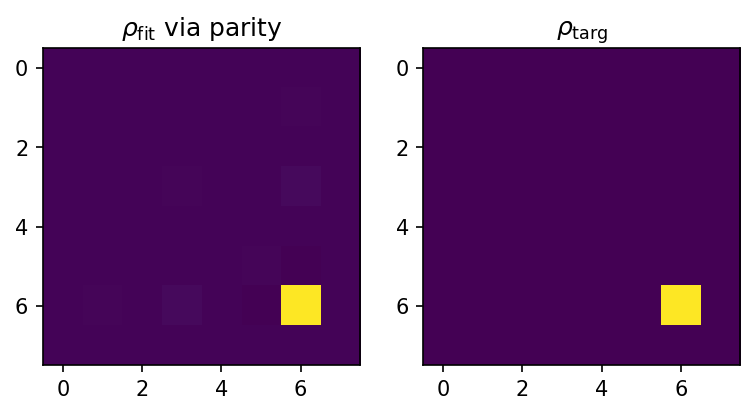

In [69]:
fig, ax = plt.subplots(1, 2, dpi=150)

ax[0].imshow(np.real(rho_fit))
ax[1].imshow(np.real(target_state))
ax[0].title.set_text(r"$\rho_{\rm fit}$ via parity")
ax[1].title.set_text(r"$\rho_{\rm targ}$")

### (c) MLE: Fitting via Measured Probability Distribution

In [55]:
from ast import literal_eval
from qiskit import QiskitError
from qiskit import QuantumCircuit
from qiskit.ignis.verification.tomography import marginal_counts, count_keys, combine_counts
from tomography import CustomTomographyFitter

In [56]:
# Parsing the counts ourselves, though CustomTomographyFitter can get it directly from results
ct_data = {}

for circuit in qcs[19]:
    counts = None
    for result in res_analysis["data"][19]["raw_data"]:
        counts = result.get_counts(circuit)
        
        # should be inside for loop to sum over results?
        if counts is None:
            raise QiskitError("Result for {} not found".format(circ.name))
        if isinstance(circuit, str):
            pauli_tup = literal_eval(circuit)
        elif isinstance(circuit, QuantumCircuit):
            pauli_tup = literal_eval(circuit.name)
        else:
            pauli_tup = circuit
        if pauli_tup in data:
            ct_data[pauli_tup] = combine_counts(data[pauli_tup], counts)
        else:
            ct_data[pauli_tup] = counts

In [57]:
ctf = CustomTomographyFitter(ct_data)

In [81]:
rho_fit_prob = ctf.fit(method='cvx', trace=1)
rho_fit_prob = make_positive_semidefinite(rho_fit_prob)
rho_fit_prob *= 1 / np.trace(rho_fit_prob)

In [82]:
state_fidelity(rho_fit_prob, target_state)

0.9958330611407304

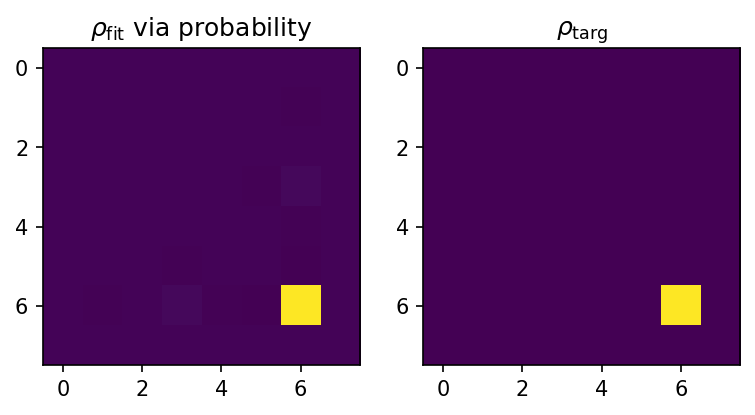

In [70]:
fig, ax = plt.subplots(1, 2, dpi=150)

ax[0].imshow(np.real(rho_fit_prob))
ax[1].imshow(np.real(target_state))
ax[0].title.set_text(r"$\rho_{\rm fit}$ via probability")
ax[1].title.set_text(r"$\rho_{\rm targ}$")

### (d) Fitting via Reconstructed Probabilities

In [93]:
formatted_prob_results = {}

for pauli_string, counts_dict in prob_results.items():
    
    formatted_counts_dict = {}
    for count_label, prob in counts_dict.items():
        count_string = ''.join([x for x in list(format(int(count_label[2:]), "#05b")[2:])])
        formatted_counts_dict[count_string] = prob
        
    formatted_prob_results[pauli_string] = formatted_counts_dict

In [96]:
ctf2 = CustomTomographyFitter(formatted_prob_results)

In [98]:
rho_fit_parity2prob = ctf.fit(method='cvx', trace=1)
rho_fit_parity2prob = make_positive_semidefinite(rho_fit_parity2prob)
rho_fit_parity2prob *= 1 / np.trace(rho_fit_parity2prob)

In [99]:
state_fidelity(rho_fit_parity2prob, target_state)

0.9958330611407304

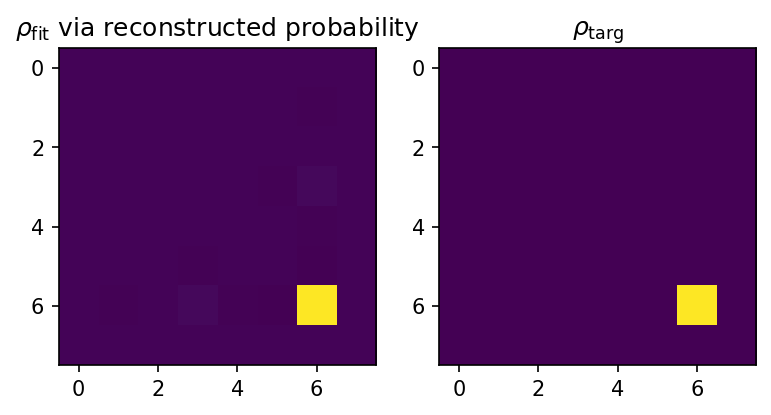

In [100]:
fig, ax = plt.subplots(1, 2, dpi=150)

ax[0].imshow(np.real(rho_fit_parity2prob))
ax[1].imshow(np.real(target_state))
ax[0].title.set_text(r"$\rho_{\rm fit}$ via reconstructed probability")
ax[1].title.set_text(r"$\rho_{\rm targ}$")